In [ ]:
!pip install dgl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##creating DGL dataset of karateclub datset from source csv file .

Here mainly all pytorch functions are used to extract the features of larateclub dataset (in csv format) 

But the torch code fpr creating DGL graph is too complex . so for that reason I am using dgl.graph function to create the final graph. 

 It is an example that DGL and pytorch works together very well and the below codes are official implimentation of dgl functions using pytorch . 

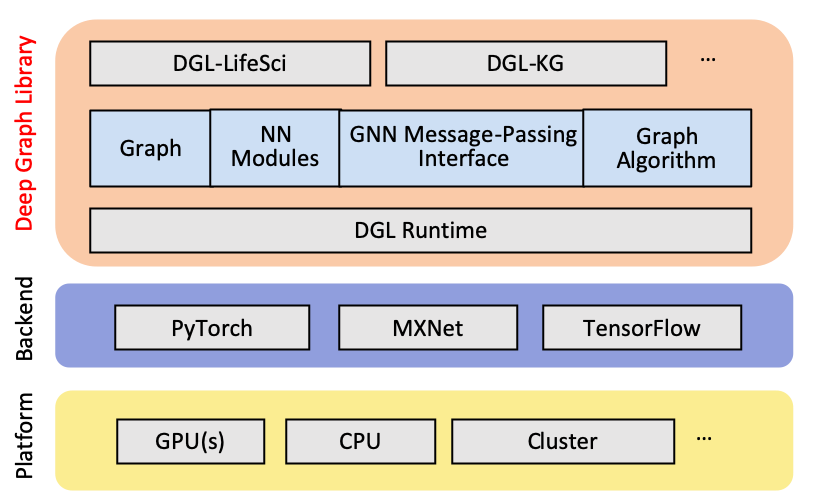

For Pytorch and CPP or cuda working together , The implementation is done in pytorchCPP.ipynb file. 

In [ ]:
import urllib.request
import pandas as pd
urllib.request.urlretrieve(
    'https://data.dgl.ai/tutorial/dataset/members.csv', './members.csv')
urllib.request.urlretrieve(
    'https://data.dgl.ai/tutorial/dataset/interactions.csv', './interactions.csv')

members = pd.read_csv('./members.csv')
members.head()


,Id,Club,Age
0,0,Mr. Hi,44
1,1,Mr. Hi,37
2,2,Mr. Hi,37
3,3,Mr. Hi,40
4,4,Mr. Hi,30


In [ ]:

interactions = pd.read_csv('./interactions.csv')
interactions.head()

,Src,Dst,Weight
0,0,1,0.043591
1,0,2,0.282119
2,0,3,0.370293
3,0,4,0.730570
4,0,5,0.821187


In [ ]:
import dgl
from dgl.data import DGLDataset
import torch
import os

class KarateClubDataset(DGLDataset):
    def __init__(self):
        super().__init__(name='karate_club')

    def process(self):
        nodes_data = pd.read_csv('./members.csv')
        edges_data = pd.read_csv('./interactions.csv')
        node_features = torch.from_numpy(nodes_data['Age'].to_numpy())
        node_labels = torch.from_numpy(nodes_data['Club'].astype('category').cat.codes.to_numpy())
        edge_features = torch.from_numpy(edges_data['Weight'].to_numpy())
        edges_src = torch.from_numpy(edges_data['Src'].to_numpy())
        edges_dst = torch.from_numpy(edges_data['Dst'].to_numpy())

        self.graph = dgl.graph((edges_src, edges_dst), num_nodes=nodes_data.shape[0])
        self.graph.ndata['feat'] = node_features
        self.graph.ndata['label'] = node_labels
        self.graph.edata['weight'] = edge_features

        # If your dataset is a node classification dataset, you will need to assign
        # masks indicating whether a node belongs to training, validation, and test set.
        n_nodes = nodes_data.shape[0]
        n_train = int(n_nodes * 0.6)
        n_val = int(n_nodes * 0.2)
        train_mask = torch.zeros(n_nodes, dtype=torch.bool)
        val_mask = torch.zeros(n_nodes, dtype=torch.bool)
        test_mask = torch.zeros(n_nodes, dtype=torch.bool)
        train_mask[:n_train] = True
        val_mask[n_train:n_train + n_val] = True
        test_mask[n_train + n_val:] = True
        self.graph.ndata['train_mask'] = train_mask
        self.graph.ndata['val_mask'] = val_mask
        self.graph.ndata['test_mask'] = test_mask

    def __getitem__(self, i):
        return self.graph

    def __len__(self):
        return 1

dataset = KarateClubDataset()
graph = dataset[0]

print(graph)

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64), 'label': Scheme(shape=(), dtype=torch.int8), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float64)})


<ipython-input-4-00e11de88c6a>:14: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:172.)
  node_labels = torch.from_numpy(nodes_data['Club'].astype('category').cat.codes.to_numpy())
